In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore') 

from scipy import stats
from datetime import timedelta


from operator import attrgetter
import matplotlib.colors as mcolors

%matplotlib inline

In [2]:
 sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [3]:
# Идентификаторы пользователей
users_unique = pd.read_csv('olist_customers_dataset.csv')
# Заказы
orders_df = pd.read_csv('olist_orders_dataset.csv', 
                        parse_dates=['order_purchase_timestamp', 
                                     'order_approved_at', 
                                     'order_delivered_carrier_date', 
                                     'order_delivered_customer_date', 
                                     'order_estimated_delivery_date'])
# Перечень товаров в заказе
products_df = pd.read_csv('olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [4]:
# # Идентификаторы пользователей
# users_unique = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/FUi5uSd6BfG_ig', 
#                           encoding='Windows-1251', sep=',')
# # Заказы
# orders_df = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/t9Li4JOfgxuUrg',
#                         encoding='Windows-1251', sep=',',
#                         parse_dates=['order_purchase_timestamp', 
#                                      'order_approved_at', 
#                                      'order_delivered_carrier_date', 
#                                      'order_delivered_customer_date', 
#                                      'order_estimated_delivery_date'])
# # Перечень товаров в заказе
# products_df = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw',
#                           encoding='Windows-1251', sep=',',
#                           parse_dates=['shipping_limit_date'])


### Просмотр данных пользователей

In [5]:
# customer_id — позаказный идентификатор пользователя (аналог номера паспорта)

# customer_unique_id —  уникальный идентификатор пользователя

# customer_zip_code_prefix —  почтовый индекс пользователя

# customer_city —  город доставки пользователя

# customer_state —  штат доставки пользователя

users_unique.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Функция просмотра краткого анализа датафрейма
def intelligence_analysis(df):
    
    # Выводимые характеристики    
    dct = {}
    na = df.isna().sum()
    shape = df.shape
    d_type = df.dtypes
    
    # Просмотр уникальных значений     
    for i in df.columns:
        dct[i] = df[i].nunique()
    return na, shape, d_type, dct

In [7]:
for i in intelligence_analysis(users_unique):
    print(i, end='\n\n')

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

(99441, 5)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

{'customer_id': 99441, 'customer_unique_id': 96096, 'customer_zip_code_prefix': 14994, 'customer_city': 4119, 'customer_state': 27}



### Просмотр данных о заказа

In [8]:
# order_id —  уникальный идентификатор заказа (номер чека)

# customer_id —  позаказный идентификатор пользователя (аналог номера паспорта)

# order_status —  статус заказа

# order_purchase_timestamp —  время создания заказа

# order_approved_at —  время подтверждения оплаты заказа

# order_delivered_carrier_date —  время передачи заказа в логистическую службу

# order_delivered_customer_date —  время доставки заказа

# order_estimated_delivery_date —  обещанная дата доставки

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [9]:
for i in intelligence_analysis(orders_df):
    print(i, end='\n\n')

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

(99441, 8)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

{'order_id': 99441, 'customer_id': 99441, 'order_status': 8, 'order_purchase_timestamp': 98875, 'order_approved_at': 90733, 'order_delivered_carrier_date': 81018, 'order_delivered_customer_date': 95664, 'order_estimated_delivery_date': 459}



### Просмотр данных о товарах

In [10]:
# order_id —  уникальный идентификатор заказа (номер чека)

# order_item_id —  идентификатор товара внутри одного заказа

# product_id —  ид товара (аналог штрихкода)

# seller_id — ид производителя товара

# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

# price —  цена за единицу товара

# freight_value —  вес товара

products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
for i in intelligence_analysis(products_df):
    print(i, end='\n\n')

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

(112650, 7)

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

{'order_id': 98666, 'order_item_id': 21, 'product_id': 32951, 'seller_id': 3095, 'shipping_limit_date': 93318, 'price': 5968, 'freight_value': 6999}



### 1. Сколько у нас пользователей, которые совершили покупку только один раз? 

В данном вопросе сложность вызывают пропуски в трех колонках:
- order_approved_at- время подтверждения оплаты заказа;
- order_delivered_carrier_date- время передачи заказа в логистическую службу;
- order_delivered_customer_date- время доставки заказа;

Так же стоит заметить, что пропуски распрастраняются на все статусы заказов в зависимости от этапа

In [12]:
df_merg = orders_df.merge(users_unique, on='customer_id')

In [13]:
df_merg.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

#### Рассмотрим самый малочисленный статус с пропусками delivered

In [14]:
# Отберем нужные колонки
df_na = df_merg[['order_status', 'order_approved_at', 'order_delivered_carrier_date', 
                           'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'order_id']]

In [15]:
first_column = df_na.query('order_status == "delivered" & order_approved_at == "NaN"')
first_column.shape

(14, 7)

In [16]:
second_column = df_na.query('order_status == "delivered" & order_approved_at == "NaN" \
                                        & order_delivered_carrier_date == "NaN"')
second_column.shape

(0, 7)

In [17]:
third_columns = df_na.query('order_status == "delivered" \
                                      & order_delivered_carrier_date == "NaN" & order_delivered_customer_date == "NaN"')
third_columns.shape

(1, 7)

Из полученного можно сделать вывод, что скорее всего в данных относительно статуса delivered допущены ошибки и даты были пропущенны. 

Но при подсчете пользователей их стоит учесть, т.к заказ получил статус **"доствлен"**, а этого не могло случиться если бы заказ не был получен. Следовательно, ошибка в данных, скорее всего, связана с невнимательностью или каким-то багом в парсере.

#### Фильтрация нужных нам даных

In [18]:
# Логично сделать вывод, что не стоит учитывать только те заказы, у которых есть пропуски в колонке order_approved_at,
# а так же заказы относящиеся к статусам created и canceled.

# Заказы относящиеся ко всем оставшимся статусам имеют даты в колонке order_approved_at 
# и в колонке order_estimated_delivery_date, а значит они оплачены(покупка совершена), 
# но находятся на этапе сборки,доставки или ожидания


df_na = df_na.query('order_status != "created" & order_status != "canceled"')

In [19]:
df_na.order_status.value_counts()

delivered      96478
shipped         1107
unavailable      609
invoiced         314
processing       301
approved           2
Name: order_status, dtype: int64

In [20]:
df_na.shape[0]

98811

In [21]:
order_buy_once = df_na.groupby('customer_unique_id', as_index=False) \
     .agg({'order_id': 'count'}).rename(columns={'order_id': 'count_order'})

In [22]:
order_buy_once.query('count_order == 1').shape[0]

92633

**92633** уникальных пользователя, которые совершили покупку только один раз

### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [23]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [24]:
orders_df.shape

(99441, 8)

In [25]:
# Оставим только те заказы, для которых подходит формулировку "не доставлен"
drop_delivered = orders_df.query('order_status != "delivered"')

In [26]:
drop_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


In [27]:
drop_delivered.shape

(2963, 8)

In [104]:
# Заведем колонку с месяцами для каждого из заказов.


# Заготовкой для вычленения параметра месяца возьмем колонку order_estimated_delivery_date, т.к ни у одного из типов заказа
# в выбранной колонке нет пропусков, плюс месяцем, когда не был доставлен заказ будем считать 
# обещанную дату доставки заказа


drop_delivered['month_order'] = drop_delivered.order_estimated_delivery_date.dt.month
drop_delivered['month_name_order'] = drop_delivered.order_estimated_delivery_date.dt.month_name()
drop_delivered['month_year'] = drop_delivered.order_estimated_delivery_date.dt.strftime("%Y-%m")

In [105]:
drop_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_order,month_name_order,month_year
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,5,May,2017-05
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,6,June,2018-06
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,8,August,2018-08
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,10,October,2017-10
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,2,February,2018-02


In [106]:
# Подсчитаем средние в каждой из групп
month_group_count = drop_delivered.groupby('month_year', as_index=False) \
        .agg({'order_id': 'count'}).rename(columns={'order_id': 'count_order'})

mean_done = round(np.mean(month_group_count.count_order.to_list()))
print(f'{mean_done} заказов в средем в месяц не доставляется по разным причинам')

114 заказов в средем в месяц не доставляется по разным причинам


In [107]:
# Сравним полученное значение с медианой, чтобы убедиться, что нет сильных выбросов
np.median(month_group_count.count_order.to_list())

132.0

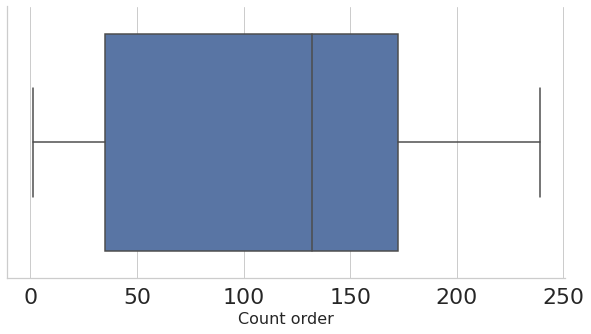

In [108]:
# Убедимся в отсутсвии выбросов на боксплоте
plt.figure(figsize=(10,5))
plt.xlabel('count order', fontsize=16)
ax = sns.boxplot(month_group_count.count_order)
ax.set_xlabel('Count order')
sns.despine()

In [111]:
barplot_df = drop_delivered.groupby(['month_year', 'order_status'], as_index=False) \
        .agg({'order_id': 'count'}).rename(columns={'order_id': 'count_order'})

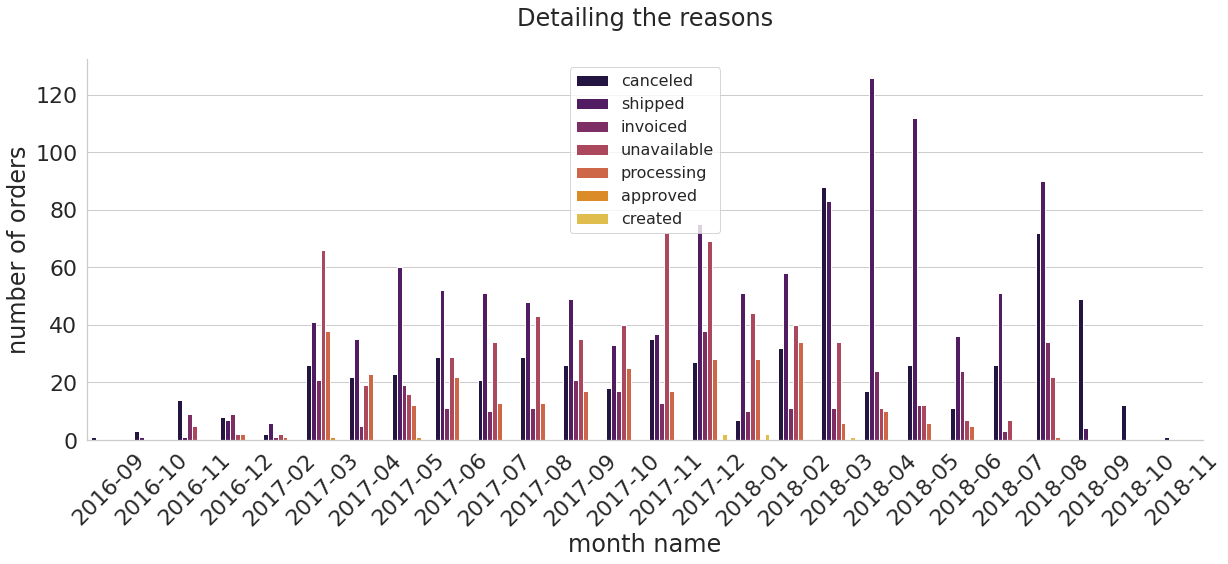

In [114]:
ax = sns.barplot(x='month_year', y='count_order', data=barplot_df, hue='order_status', palette='inferno')
# ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
# ax.set_xticklabels(['January', 'February', 'March', 'April',  'May', 'June', 
#              'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_title('Detailing the reasons\n')
ax.set_ylabel('number of orders') 
ax.set_xlabel('month name')
ax.legend(prop={"size":16})
ax.tick_params(axis='x', rotation=45)
sns.despine()

### 3. По каждому товару определить, в какой день недели товар чаще всего покупается

In [35]:
# Исходя из данных товары содержатся в колонке product_id таблицы products_df.
# Для получения дня недели добавим дату совершния оплаты заказа order_approved_at 

merge_product_date = products_df.merge(orders_df, on='order_id')

In [36]:
merge_product_date.shape

(112650, 14)

In [37]:
merge_product_date.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
dtype: int64

In [38]:
merge_product_date.query('order_approved_at == "NaN"').order_status.value_counts()

delivered    15
Name: order_status, dtype: int64

In [39]:
merge_product_date.product_id.nunique()

32951

In [40]:
merge_product_date.dropna(subset=['order_approved_at'], inplace=True)

In [41]:
merge_product_date.product_id.nunique()

32948

На предыдущих шагах мы сделали проверку на пропущенные значения в интересующей нас колонке, после удаления таких значений получили результат на 3 единицы меньше, по сравнению с первоначальными данными.

Т.к пропуски были совершены в группе товаров **delivered** , а в первом задании мы разобрались, что это ошибки сбора данных. Учитывая размер данных, значением в 3 единицы можно пренебречь. Тут же стоит сделать фильтрацию на предмет "совершена покупка пользователем или нет", как в **первом вопросе**.

In [42]:
merge_product_date = merge_product_date.query('order_status != "created" & order_status != "canceled"')

In [43]:
merge_product_date.product_id.nunique()

32732

In [44]:
merge_product_date = merge_product_date.assign(day_of_week = merge_product_date.order_approved_at.dt.day_name())

In [45]:
merge_product_date.day_of_week.unique()

array(['Wednesday', 'Sunday', 'Saturday', 'Thursday', 'Tuesday', 'Monday',
       'Friday'], dtype=object)

In [46]:
# Подсчитаем количество покупок для каждого товара в каждый день недели
count_product_per_day = merge_product_date.groupby(['product_id', 'day_of_week'], as_index=False) \
                            .agg({'order_id': 'count'}).rename(columns={'order_id': 'product_count'}) \
                            .sort_values(by='product_count', ascending=False)


In [47]:
# Выведем день, когда было совершено наибольшее приобретение каждого из товаров
count_product_per_day.groupby('product_id').head(1)

,product_id,day_of_week,product_count
40854,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20038,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
15846,422879e10f46682990de24d770e7f83d,Tuesday,89
36366,99a4788cb24856965c36a24e339b6058,Tuesday,82
12998,368c6c730842d78016ad823897a372db,Thursday,80
...,...,...,...
23842,63dfa8b12200610ed7b5e41d3c888a25,Saturday,1
23846,63e51e65ec59b56039c6427eed73dcf0,Tuesday,1
23847,63eb97106bfe47fe857edcf78f3e3e08,Saturday,1
23857,63f52009dc3ddb733394e80183aed0f0,Saturday,1


Полученное результирующее число товаров равняется изначальному после фильтрации данных: merge_product_date.product_id.nunique() == **32732**

### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

Для подсчета среднего нам необходимо взять дату **совершения покупки** (order_approved_at), вычленить из нее месяц и соотнести с количеством дней в месяце. После рассчитать количестов недель в месяце.

In [48]:
# Воспользуемся созданным на предыдущих этапах датафреймомо

df_merg.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [49]:
# Выполни фильтрацию и уберем не подходящие нам данные (те заказы, которые не были куплены)

df_merg = df_merg.query('order_status != "created" & order_status != "canceled"')

In [50]:
df_merg.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1228
order_delivered_customer_date    2341
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [51]:
df_merg.customer_unique_id.nunique()

95556

In [52]:
test_df = df_merg.dropna(subset=['order_approved_at'])
test_df.customer_unique_id.nunique()

95543

In [53]:
df_merg.customer_unique_id.nunique() - test_df.customer_unique_id.nunique()

13

Если удалить пропущенные значения в нужной нам колонке, то потеряем 13 пользователей, что возможно не имеет сильной роли, но попробуем заменить эти пропуски датой из другой колонки(чтобы понять, в каком месяце был куплен заказ).

Для этого вычтем из колонки  order_approved_at колонку order_purchase_timestamp. Именна такая разность дает наиболее точный результат и наименьшие выбросы, а так же order_purchase_timestamp не имеет пропусков. На основании чего можно сделать вывод, что если мы и ошибемся, то значение ошибка будет существенно ниже, чем если бы мы просто дропнули значения.

In [54]:
df_merg['difference_date'] = df_merg.order_approved_at - df_merg.order_purchase_timestamp 

In [55]:
df_merg.query('order_status == "delivered"')[['difference_date']].sort_values(by='difference_date', ascending=False)

,difference_date
96251,30 days 21:26:37
55708,30 days 18:26:56
88671,23 days 02:47:06
71651,16 days 20:13:44
73881,13 days 07:31:58
...,...
61743,NaT
63052,NaT
67697,NaT
72407,NaT


In [56]:
df_merg.query('order_status == "delivered"')[['difference_date']].sort_values(by='difference_date')

,difference_date
92125,0 days
50694,0 days
50767,0 days
23642,0 days
3029,0 days
...,...
61743,NaT
63052,NaT
67697,NaT
72407,NaT


In [57]:
# Для самопроверки
check_values = df_merg.query('order_status == "delivered" & order_approved_at == "NaN"').customer_id.to_list()
check_values

['2127dc6603ac33544953ef05ec155771',
 '4c1ccc74e00993733742a3c786dc3c1f',
 '2941af76d38100e0f8740a374f1a5dc3',
 '29c35fc91fc13fb5073c8f30505d860d',
 '1e101e0daffaddce8159d25a8e53f2b2',
 '684cb238dc5b5d6366244e0e0776b450',
 '68d081753ad4fe22fc4d410a9eb1ca01',
 '0bf35cac6cc7327065da879e2d90fae8',
 'd5de688c321096d15508faae67a27051',
 'a3d3c38e58b9d2dfb9207cab690b6310',
 '07a2a7e0f63fd8cb757ed77d4245623c',
 'f67cd1a215aae2a1074638bbd35a223a',
 'd85919cb3c0529589c6fa617f5f43281',
 '74bebaf46603f9340e3b50c6b086f992']

In [58]:
df_merg['order_approved_at'] = df_merg.order_approved_at.fillna(df_merg.order_purchase_timestamp)

In [59]:
df_merg.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1228
order_delivered_customer_date    2341
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
difference_date                    14
dtype: int64

In [60]:
# Все корректно заменилось
df_merg.query('customer_id in @check_values')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,difference_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-18 14:40:00,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,8a9a08c7ca8900a200d83cf838a07e0b,6708,cotia,SP,NaT
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,2017-02-18 12:45:31,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,91efb7fcabc17925099dced52435837f,93548,novo hamburgo,RS,NaT
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,2017-02-18 13:29:47,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,e1f01a1bd6485e58ad3c769a5427d8a8,8230,sao paulo,SP,NaT
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,2017-02-18 16:48:35,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,7e1a5ca61b572d76b64b6688b9f96473,62700,caninde,CE,NaT
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,2017-02-17 13:05:55,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ,NaT
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,2017-01-19 12:48:08,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,6ff8b0d7b35d5c945633b8d60165691b,11030,santos,SP,NaT
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,2017-02-19 01:28:47,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP,NaT
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,2017-02-18 11:04:19,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,c4c0011e639bdbcf26059ddc38bd3c18,13225,varzea paulista,SP,NaT
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,2017-01-19 22:26:59,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,d49f3dae6bad25d05160fc17aca5942d,36400,conselheiro lafaiete,MG,NaT
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,2017-02-17 17:21:55,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG,NaT


In [61]:
df_need_columns = df_merg[['order_id', 'order_approved_at', 'customer_unique_id']]

In [62]:
df_need_columns = df_need_columns.assign(date_moth = df_need_columns.order_approved_at.dt.month)

In [63]:
df_need_columns = df_need_columns.assign(date_year = df_need_columns.order_approved_at.dt.year)

In [64]:
df_need_columns = df_need_columns.assign(number_weeks_month = round(df_need_columns.order_approved_at.dt.days_in_month / 7, 2))

In [65]:
df_need_columns

,order_id,order_approved_at,customer_unique_id,date_moth,date_year,number_weeks_month
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff,10,2017,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231,7,2018,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8,8,2018,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977,11,2017,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6,2,2018,4.00
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,3,2017,4.43
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 13:10:37,da62f9e57a76d978d02ab5362c509660,2,2018,4.00
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 15:04:16,737520a9aad80b3fbbdad19b66b37b30,8,2017,4.43
99439,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21,5097a5312c8b157bb7be58ae360ef43c,1,2018,4.43


In [66]:
group_df = df_need_columns.groupby(['customer_unique_id','date_year', 'date_moth'], as_index=False) \
                .agg({'order_id': 'count'}).rename(columns={'order_id': 'count_order_by_customer'})

In [67]:
group_df = group_df.merge(df_need_columns, on=['customer_unique_id','date_year', 'date_moth'])

In [68]:
group_df.isna().sum()

customer_unique_id         0
date_year                  0
date_moth                  0
count_order_by_customer    0
order_id                   0
order_approved_at          0
number_weeks_month         0
dtype: int64

In [69]:
group_df

,customer_unique_id,date_year,date_moth,count_order_by_customer,order_id,order_approved_at,number_weeks_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,5,1,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 11:11:18,4.43
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,5,1,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 18:25:44,4.43
2,0000f46a3911fa3c0805444483337064,2017,3,1,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,4.43
3,0000f6ccb0745a6a4b88665a16c9f078,2017,10,1,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:49:17,4.43
4,0004aac84e0df4da2b147fca70cf8255,2017,11,1,d957021f1127559cd947b62533f484f7,2017-11-14 20:06:52,4.29
...,...,...,...,...,...,...,...
98806,fffcf5a5ff07b0908bd4e2dbc735a684,2017,6,1,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:15:16,4.29
98807,fffea47cd6d3cc0a88bd621562a9d061,2017,12,1,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:16:20,4.43
98808,ffff371b4d645b6ecea244b27531430a,2017,2,1,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 16:02:44,4.00
98809,ffff5962728ec6157033ef9805bacc48,2018,5,1,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:58:47,4.43


In [70]:
# Найдем среднее

group_df = group_df.assign(mean_order_in_month = round(group_df.count_order_by_customer / group_df.number_weeks_month, 2))
group_df.head()

,customer_unique_id,date_year,date_moth,count_order_by_customer,order_id,order_approved_at,number_weeks_month,mean_order_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,5,1,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 11:11:18,4.43,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,5,1,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 18:25:44,4.43,0.23
2,0000f46a3911fa3c0805444483337064,2017,3,1,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,4.43,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017,10,1,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:49:17,4.43,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017,11,1,d957021f1127559cd947b62533f484f7,2017-11-14 20:06:52,4.29,0.23


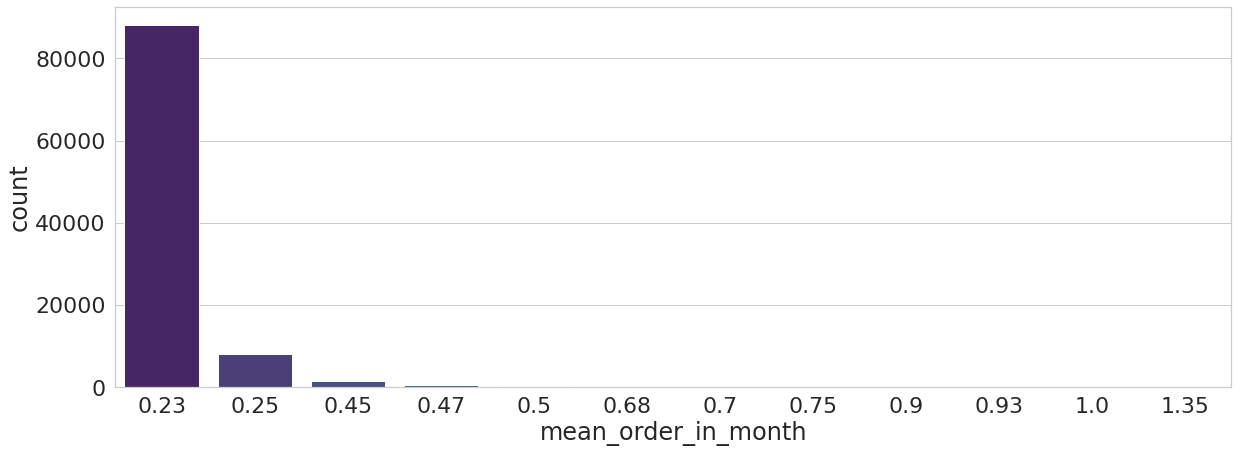

In [71]:
# Количество значений средних покупок в неделю

sns.countplot(group_df.mean_order_in_month, palette="viridis")

### 5. Напиши функцию на python, позволяющую строить когортный анализ. В период с января по декабрь выяви когорту с самым высоким retention на 3-й месяц.

In [72]:
# Возьмем объединенные данные по клиенту и заказам
df_merg_step_5 = orders_df.merge(users_unique, on='customer_id')

In [73]:
df_merg_step_5.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

Т.к нам необходимо представить в отчете показатель retention, а значит нужны даты всех заказов, то возьмем за искумумаю дату из переменной **order_purchase_timestamp**

In [74]:
# Посмотрим на % клиентов, которые сделали заказ больше одного раза

# Для каждого пользователя посчитаем кол-во заказов
n_orders = df_merg_step_5.groupby(['customer_unique_id'])['order_purchase_timestamp'].nunique()

# Посчитаем отношение пользователей, совершивших больше одного заказа ко всем пользователям
mult_orders_perc = np.sum(n_orders > 1) / df_merg_step_5['customer_unique_id'].nunique()

# Выводим результат
print(f'{100 * mult_orders_perc:.2f}% клиентов создавших заказ  более одного раза.')

2.85% клиентов создавших заказ  более одного раза.


#### Когортный анализ будем стороить по всему периоду, который присутсвует в данных. Т.к в задаче нет четких рамок, можно предположить, что нас интересует отчет за предоставленный период

In [75]:
df_need = df_merg_step_5[['customer_unique_id', 'order_purchase_timestamp']].drop_duplicates()

In [76]:
def cohort_analysis(df):
    
    # Распоковывем названия столбцов в нужные переменные
    customer, date = [i for i in list(df.columns)]
    
    # Период для каждой из покупки
    df['order_month'] = df[date].dt.to_period('M')

    # Период первой покупки для каждого из пользователей (когорта)
    df['cohort'] = df.groupby(customer)[date] \
                     .transform('min') \
                     .dt.to_period('M') 
    
    
    # Подсчитываем кол-во уникальных пользователей в когорте
    df_cohort = df.groupby(['cohort', 'order_month']) \
                  .agg(n_customers=(customer, 'nunique')) \
                  .reset_index(drop=False)

    # Формируем количество периодов между месяцем когорты и месяцем покупки
    df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
    
    
    # Разворачиваем получившуюся таблицу к виду: каждая строка == когорта, каждый столбец == период
    cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                         columns = 'period_number',
                                         values = 'n_customers')
    
    
    # Возьмем размер каждой когорты в день первого заказа
    cohort_size = cohort_pivot.iloc[:,0]

    # Разделим значение пользователей в каждой когорте на значение пользователей в день первого заказа
    retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
    
    # Визуализация анализа 
    ur_style = (retention_matrix
                .style
                .set_caption('User retention by cohort')  # добавляем подпись
                .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
                .highlight_null('white')  # делаем белый фон для значений NaN
                .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
    
    return ur_style, retention_matrix

In [77]:
st , retention_matrix = cohort_analysis(df_need)    

In [78]:
st

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,100.00%,,,,,,,,,,,,,,,,,,,
2016-10,100.00%,,,,,,0.31%,,,0.31%,,0.31%,,0.31%,,0.31%,,0.31%,0.62%,0.62%
2016-12,100.00%,100.00%,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.39%,0.26%,0.13%,0.39%,0.13%,0.52%,0.13%,0.13%,,0.39%,0.13%,0.79%,0.39%,0.13%,0.13%,0.26%,0.39%,0.13%,
2017-02,100.00%,0.23%,0.29%,0.11%,0.40%,0.11%,0.23%,0.17%,0.17%,0.23%,0.11%,0.29%,0.17%,0.17%,0.11%,0.06%,0.06%,0.23%,,
2017-03,100.00%,0.49%,0.38%,0.38%,0.34%,0.15%,0.15%,0.30%,0.34%,0.08%,0.38%,0.15%,0.23%,0.11%,0.15%,0.23%,0.08%,0.15%,,
2017-04,100.00%,0.60%,0.21%,0.17%,0.34%,0.26%,0.34%,0.30%,0.30%,0.17%,0.26%,0.09%,0.09%,0.04%,0.09%,0.09%,0.21%,,,
2017-05,100.00%,0.50%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,0.25%,0.31%,0.25%,0.33%,0.25%,0.03%,0.19%,0.25%,,,,
2017-06,100.00%,0.48%,0.35%,0.41%,0.25%,0.38%,0.38%,0.22%,0.13%,0.22%,0.32%,0.35%,0.16%,0.13%,0.19%,,,,,


In [79]:
# Когорта с самым высоким retention на 3-й месяц
third_month = retention_matrix.unstack().to_frame(name='value').reset_index().query('period_number == 3')
max_value = third_month.value.max()
third_month.query('value == @max_value')

,period_number,cohort,value
83,3,2017-06,0.004141


### 6. Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M (и опиши подробно, как были построены метрики R, F, M).

In [80]:
products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [120]:
products_df.shape

(112650, 8)

In [122]:
products_df.order_id.nunique()

98666

In [123]:
sum_order_df = products_df.groupby('order_id', as_index=False) \
            .agg({'price': 'sum'})

In [124]:
sum_order_df

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


In [125]:
# Для подсчета метрик нам необходимы: сумма заказа, дата совершения заказа, уникальный user_id клиента
# Если с суммой заказа все понятно, точно так же, как и с user_id (для нас это customer_unique_id),
# то с датой есть несколько вариантов, либо использовать колонку order_purchase_timestamp, либо order_approved_at.
# Исходя из определения метрики F - frequency — частота (как часто клиенты покупают);
# M - monetary — деньги (общая сумма покупок), будем пользоваться колонкой order_approved_at (время подтверждения оплаты заказа)

merge_sum_order = sum_order_df.merge(orders_df, on='order_id')

In [126]:
full_merge_df = merge_sum_order.merge(users_unique, on='customer_id')

In [127]:
full_merge_df.isna().sum()

order_id                            0
price                               0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1009
order_delivered_customer_date    2190
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [128]:
full_merge_df.head()

,order_id,price,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [129]:
# Предодобработаем данные

full_merge_df = full_merge_df.query('order_status != "created" & order_status != "canceled"')
full_merge_df.dropna(subset=['order_approved_at'], inplace=True)

In [131]:
# Отберем нужные колонки

need_columns_df = full_merge_df[['customer_unique_id', 'price', 'order_approved_at', 'order_id']]

In [132]:
need_columns_df.nunique()

customer_unique_id    94976
price                  7715
order_approved_at     89763
order_id              98191
dtype: int64

In [133]:
need_columns_df.head()

,customer_unique_id,price,order_approved_at,order_id
0,871766c5855e863f6eccc05f988b23cb,58.90,2017-09-13 09:45:35,00010242fe8c5a6d1ba2dd792cb16214
1,eb28e67c4c0b83846050ddfb8a35d051,239.90,2017-04-26 11:05:13,00018f77f2f0320c557190d7a144bdd3
2,3818d81c6709e39d06b2738a8d3a2474,199.00,2018-01-14 14:48:30,000229ec398224ef6ca0657da4fc703e
3,af861d436cfc08b2c2ddefd0ba074622,12.99,2018-08-08 10:10:18,00024acbcdf0a6daa1e931b038114c75
4,64b576fb70d441e8f1b2d7d446e483c5,199.90,2017-02-04 14:10:13,00042b26cf59d7ce69dfabb4e55b4fd9


In [134]:
def create_rfm_analysis(df):
    """
    Функция для построения RMF анализа.
    
    Параметры:
    --------
    df: pandas DataFrame
      Датасет
      
    """
    
    # Распоковывем названия столбцов в нужные переменные
    user_id, price, date, variable_count = [i for i in list(df.columns)]
    
    # Создаем переменную с максимальной датой для дальнейшего рассчета recency
    snapshot_date = df[date].max()+ timedelta(days=1)
    
    # Предобработаем данные
    df_preprocess = df.groupby([user_id]).agg({
        date: lambda x: (snapshot_date - x.max()).days,
        variable_count: 'count',
        price: 'sum'})
    
    # Переименуем колонки
    df_preprocess.rename(columns={date: 'recency',
                         variable_count: 'frequency',
                         price: 'monetary'}, inplace=True)
    
    
    # Наименование рангов для recency и frequency
    r_labels = range(4, 0, -1); f_labels = range(1, 5)
    # Делаем присвоение рангов для метрики recency, с использованием метода rank, чтобы избежать ошибки
    r_groups = pd.qcut(df_preprocess['recency'].rank(method='first'), q=4, labels=r_labels)
    # Делаем присвоение рангов для метрики frequency, с использованием метода rank, чтобы избежать ошибки
    f_groups = pd.qcut(df_preprocess['frequency'].rank(method='first'), q=4, labels=f_labels)
    # Создадим новые колонки
    df_preprocess = df_preprocess.assign(R = r_groups.values, F = f_groups.values)
    # Наименование рангов для monetary
    m_labels = range(1, 5)
    # Делаем присвоение рангов для метрики monetary, с использованием метода rank, чтобы избежать ошибки
    m_groups = pd.qcut(df_preprocess['monetary'].rank(method='first'), q=4, labels=m_labels)
    # Создадим новую колонку
    df_preprocess = df_preprocess.assign(M = m_groups.values)
    
    
    # Создадим сегменты RFM метрики с использованием конкатенации колонок R, F и M
    def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])

    df_preprocess['RFM_Segment_Concat'] = df_preprocess.apply(join_rfm, axis=1)
    
    # Уберем ненужные символы
    df_preprocess['RFM_Segment_Concat'] = df_preprocess.RFM_Segment_Concat.apply(lambda x: x.replace('.0', ''))
    
    # Подсчитаем сумму сегментов для ранжирования по сумме
    df_preprocess['RFM_Score'] = df_preprocess[['R','F','M']].sum(axis=1)
    
    

        
    # Подсчет среднего в каждой из метрик в каждом кластере
    RFM_Segment_Concat_agg = df_preprocess.groupby('RFM_Segment_Concat').agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': ['mean', 'count']
    }).round(1).reset_index()
    
    return RFM_Segment_Concat_agg , df_preprocess
    
    


In [136]:
RFM_Segment_Concat_agg, df_preprocess = create_rfm_analysis(need_columns_df)

In [118]:
RFM_Segment_Concat_agg

RFM_Segment_Concat recency frequency monetary      
                         mean      mean     mean count
0                 111   461.2       1.0     29.4  1535
1                 112   452.9       1.0     67.8  1583
2                 113   460.9       1.0    122.0  1430
3                 114   459.0       1.0    418.6  1470
4                 121   460.3       1.0     29.4  1614
..                ...     ...       ...      ...   ...
59                434    65.5       1.0    446.2  1411
60                441    61.2       1.0     29.8  1379
61                442    59.5       1.1     67.4  1377
62                443    62.6       1.1    123.5  1488
63                444    63.7       1.4    437.2  1737

[64 rows x 5 columns]

In [137]:
df_preprocess

,recency,frequency,monetary,R,F,M,RFM_Segment_Concat,RFM_Score
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,3,413,8
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,6
0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,4
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,4
0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214,7
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,4,4,144,9
fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,2,4,2,242,8
ffff371b4d645b6ecea244b27531430a,574,1,89.90,1,4,3,143,8


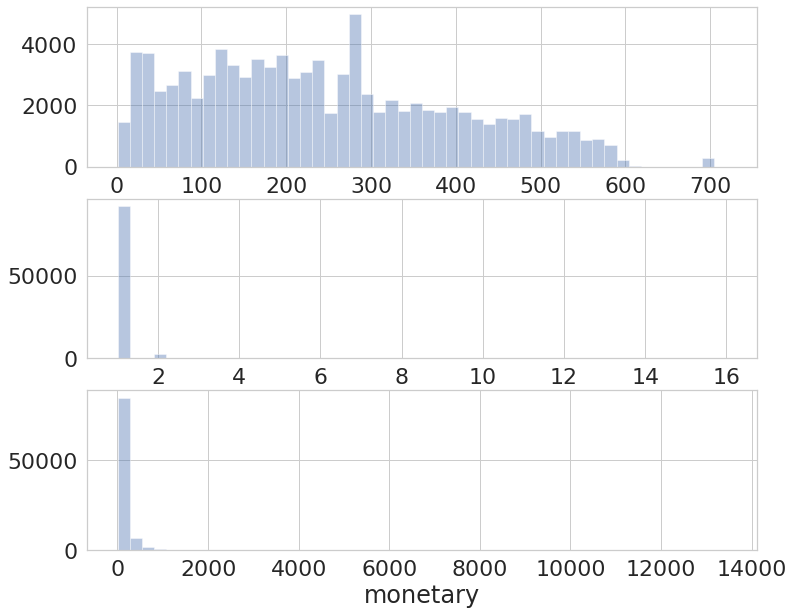

In [138]:
# Посмотрим на распределение
plt.figure(figsize=(12,10))

plt.subplot(3, 1, 1); sns.distplot(df_preprocess['recency'], kde=False)
plt.subplot(3, 1, 2); sns.distplot(df_preprocess['frequency'], kde=False)
plt.subplot(3, 1, 3); sns.distplot(df_preprocess['monetary'], kde=False)

plt.show()

Искомый результат получен.

Для построения метрик нам необходимы были данные содержащие 4 колонки: 
- идентификатор пользователя;
- общая сумма одного заказа
- дата совершения заказа
- колонка по которой считается частота совершения покупок

Дальше мы заводим переменную в которой хранится максимальный день в данных, это необходимо для расчета давности покупки клиентом.

По озвученным выше колонкам рассчитываются метрики:
- recency: максимальная дата каждого из пользователей вычитается из нашей переменной с максимальной датой
- frequency: считаем количество приобретенного товара на каждого из пользователей
- monetary: считаем сумму всех покупок пользователем за предоставленный нам период 

После расставляем ранги для полученных метрик. Заводим переменные, где сгенерированы 4 числа от 1 до 4, это будут наименования для разделения на группы. Следующим шагом следует само разбиение на группы, это делается с помощью функции qcut, куда передается нужная колонка и данные бьются на 4 группы (задается в атрибуте q=4).

По сути мы получили значения каждой из метрик, но для удобства разбиваем еще раз полученные данные на сегменты. Делаем это с помощью конкатенации колонок R, F и M. Тут же считаем сумму этих по строчно для колонок R, F и M.

Предыдущий шаг был необходим, чтобы отнести каждый случай под свой сегмент, где рассчитываем среднее по сформированныем кластерам типа 111, 112, 113 и т.д